# Python Assignment 4

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

Modified split -> train: 165  test: 44
Iter 500/2500, loss = 0.262307
Iter 1000/2500, loss = 0.175468
Iter 1500/2500, loss = 0.131334
Iter 2000/2500, loss = 0.104556
Iter 2500/2500, loss = 0.086620
Training on modified dataset complete.
Modified Training Accuracy: 100.00%
Modified Test Accuracy:     54.55%
Misclassified indices in modified test set (0-based): [ 2  4  5  6  7  8 10 12 14 18 20 23 27 30 31 32 33 35 39 40]
Number misclassified: 20


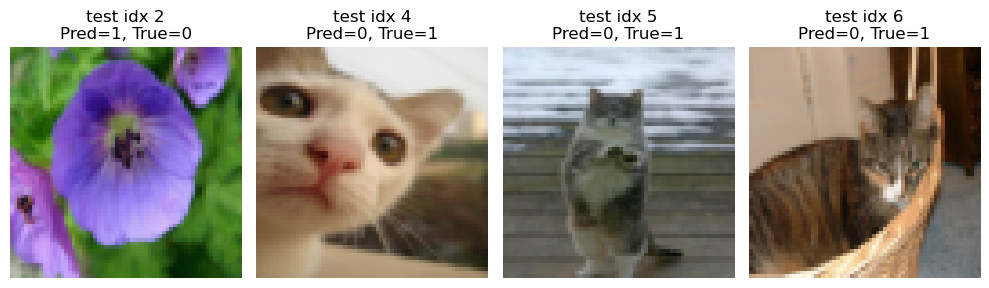

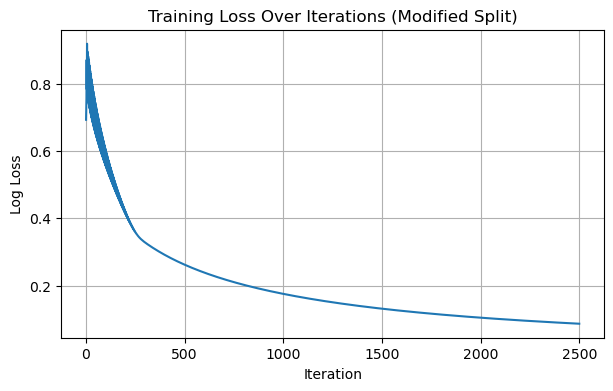

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#loading data from .h5 files
def load_train_only():
    train_file = h5py.File("train_catvnoncat.h5", "r")
    X = np.array(train_file["train_set_x"][:])     #shape (209, 64,64,3)
    y = np.array(train_file["train_set_y"][:])     #shape (209,)
    return X, y

#load data
X_all_raw, y_all = load_train_only()

#modify the split
#SBU ID is 114404255 which ends in "5"
train_size = 160 + 5   #165

X_train_raw = X_all_raw[:train_size]
y_train_raw = y_all[:train_size].reshape(1, -1)

X_test_raw = X_all_raw[train_size:]
y_test_raw = y_all[train_size:].reshape(1, -1)

print("Modified split -> train:", X_train_raw.shape[0], " test:", X_test_raw.shape[0])

#flatten images to column vectors and scale to [0,1]
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1).T / 255.0
X_test  = X_test_raw.reshape(X_test_raw.shape[0], -1).T / 255.0

n_x = X_train.shape[0]
m_train = X_train.shape[1]
m_test = X_test.shape[1]

#parameters and hyperparameters
learning_rate = 0.005
num_iters = 2500

W = np.zeros((n_x, 1))
b = 0.0
loss_history = []

#gradient descent training
for i in range(num_iters):
    #forward propagation
    Z = np.dot(W.T, X_train) + b
    A = sigmoid(Z)
    #compute loss
    loss = -np.mean(y_train_raw * np.log(A + 1e-8) + (1 - y_train_raw) * np.log(1 - A + 1e-8))
    loss_history.append(loss)

    #backward propagation
    dZ = A - y_train_raw
    dW = (X_train @ dZ.T) / m_train
    db = np.mean(dZ)

    #parameter update
    W -= learning_rate * dW
    b -= learning_rate * db

    #print progress
    if (i+1) % 500 == 0:
        print(f"Iter {i+1}/{num_iters}, loss = {loss:.6f}")

print("Training on modified dataset complete.")

#predictions and accuracy
def predict(W, b, X):
    probs = sigmoid(np.dot(W.T, X) + b)
    return (probs >= 0.5).astype(int)

train_pred = predict(W, b, X_train)
test_pred  = predict(W, b, X_test)

train_acc = np.mean(train_pred == y_train_raw) * 100
test_acc  = np.mean(test_pred == y_test_raw) * 100

print(f"Modified Training Accuracy: {train_acc:.2f}%")
print(f"Modified Test Accuracy:     {test_acc:.2f}%")

#misclassified indicies
mis_idx = np.where(test_pred.reshape(-1) != y_test_raw.reshape(-1))[0]
print("Misclassified indices in modified test set (0-based):", mis_idx)
print("Number misclassified:", len(mis_idx))

#display 4 misclassified images
num_to_show = min(4, len(mis_idx))
if num_to_show > 0:
    plt.figure(figsize=(10,6))
    for i in range(num_to_show):
        idx = mis_idx[i]
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(X_test_raw[idx])
        plt.title(f"test idx {idx}\nPred={int(test_pred[0,idx])}, True={int(y_test_raw[0,idx])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images to show.")

#plot the loss curve
plt.figure(figsize=(7,4))
plt.plot(loss_history)
plt.title("Training Loss Over Iterations (Modified Split)")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()
